In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv
from graph_tiger.measures import run_measure
from graph_tiger.attacks import run_attack_method, get_attack_methods
from graph_tiger.graphs import graph_loader
from graph_tiger.cascading import Cascading
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
import graph_tiger
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

In [2]:
product_code = [i for i in range(270100, 271601)]
file_path_2020 = f'/Users/sunruogu/Desktop/Network_Attack/BACI_HS92_V202201/BACI_HS92_Y2020_V202201.csv'
file_path_2017 = f'/Users/sunruogu/Desktop/Network_Attack/BACI_HS92_V202201/BACI_HS92_Y2017_V202201.csv'
file_path_2014 = f'/Users/sunruogu/Desktop/Network_Attack/BACI_HS92_V202201/BACI_HS92_Y2014_V202201.csv'
file_path_2011 = f'/Users/sunruogu/Desktop/Network_Attack/BACI_HS92_V202201/BACI_HS92_Y2011_V202201.csv'
file_path_2008 = f'/Users/sunruogu/Desktop/Network_Attack/BACI_HS92_V202201/BACI_HS92_Y2008_V202201.csv'

In [3]:
def fun1(file_path):
    df = pd.read_csv(file_path)
    df = df[df["k"].isin(product_code)]
    for q in df["q"]:
        index = 0
        try:
            df.iloc[index, -1] = float(q.strip())
        except ValueError:
            df.iloc[index, -1] = 0
        index += 1
    return df

In [4]:
def fun2(df):
    df11 = df[['i', 'j', 'v']]
    # df12 = df[['i', 'j', 'q']]
    df21 = df11.groupby(['i', 'j'], as_index=False).sum()
    # df22 = df12.groupby(['i', 'j'], as_index=False).sum()
    # df21["q"] = df22["q"]
    df1 = df21
    return df1

In [5]:
def fun3(df1):
    df000=[]
    print(sum(df1["v"]))
    for i in np.array(df1["v"]):
        df000.append(i/sum(np.array(df1["v"])))
    df1["v"]=df000
    return df1

In [6]:
def plot(df1):
    G = nx.Graph()
    # G = nx.from_pandas_edgelist(df1, 'i', "j", ["v"], create_using=nx.DiGraph())
    G = nx.from_pandas_edgelist(df1, 'i', "j", ["v"])
    G=G.subgraph(max(nx.connected_components(G),key=len))
    return G

In [11]:
def result(file_path_2020,file_path_2017,file_path_2014,file_path_2011,file_path_2008,xlabel='Steps', line_label='', experiment=''):
    plt.figure(figsize=(6.4, 4.8))

    title=""
    #####################################################
    df=fun1(file_path_2020)
    df1=fun2(df)
    df1=fun3(df1)
    G=plot(df1)
    params = {
   'runs': 1,
   'steps': 100,
   'seed': 1,

   'l': 0.9,
   'r': 0.2,
   'c': int(0.1 * len(G)),
   #  'c': tuple(dict(nx.betweenness_centrality(G,normalized=True)).values()),

   'k_a': 10,
   'attack': 'id_node',
   # 'attack_approx': int(0.1 * len(G)),

   'k_d': 0,
   'defense': None,

   'robust_measure': 'spectral_radius',

   'plot_graph_transition': True,  # False turns off key simulation image "snapshots"
   'gif_animation': False,  # True creaets a video of the simulation (MP4 file)
   'gif_snaps': True,  # True saves each frame of the simulation as an image

   # 'edge_style': 'bundled',
   # 'node_style': 'force_atlas',
   # 'fa_iter': 2000,
}
    cascading = Cascading(G, **params)
    results = cascading.run_simulation()
    key=[i for i in range(len(results))]
    d=zip(key,results)
    d=dict(d)
    for strength, result in d.items():
        result_norm = [r / len(G) for r in results]
    plt.plot(result_norm, label="{}: {}".format(line_label, strength),linestyle='-')
    #####################################################
    df=fun1(file_path_2017)
    df1=fun2(df)
    df1=fun3(df1)
    G=plot(df1)
    params = {
   'runs': 1,
   'steps': 100,
   'seed': 1,

   'l': 0.9,
   'r': 0.2,
   'c': int(0.1 * len(G)),
   #  'c': tuple(dict(nx.betweenness_centrality(G,normalized=True)).values()),

   'k_a': 10,
   'attack': 'id_node',
   # 'attack_approx': int(0.1 * len(G)),

   'k_d': 0,
   'defense': None,

   'robust_measure': 'spectral_radius',

   'plot_graph_transition': True,  # False turns off key simulation image "snapshots"
   'gif_animation': False,  # True creaets a video of the simulation (MP4 file)
   'gif_snaps': True,  # True saves each frame of the simulation as an image

   # 'edge_style': 'bundled',
   # 'node_style': 'force_atlas',
   # 'fa_iter': 2000,
}
    cascading = Cascading(G, **params)
    results = cascading.run_simulation()
    key=[i for i in range(len(results))]
    d=zip(key,results)
    d=dict(d)
    for strength, result in d.items():
        result_norm = [r / len(G) for r in results]
    plt.plot(result_norm, label="{}: {}".format(line_label, strength),linestyle='--')
    #####################################################
    df=fun1(file_path_2014)
    df1=fun2(df)
    df1=fun3(df1)
    G=plot(df1)
    params = {
   'runs': 1,
   'steps': 100,
   'seed': 1,

   'l': 0.9,
   'r': 0.2,
   'c': int(0.1 * len(G)),
   #  'c': tuple(dict(nx.betweenness_centrality(G,normalized=True)).values()),

   'k_a': 10,
   'attack': 'id_node',
   # 'attack_approx': int(0.1 * len(G)),

   'k_d': 0,
   'defense': None,

   'robust_measure': 'spectral_radius',

   'plot_graph_transition': True,  # False turns off key simulation image "snapshots"
   'gif_animation': False,  # True creaets a video of the simulation (MP4 file)
   'gif_snaps': True,  # True saves each frame of the simulation as an image

   # 'edge_style': 'bundled',
   # 'node_style': 'force_atlas',
   # 'fa_iter': 2000,
}
    cascading = Cascading(G, **params)
    results = cascading.run_simulation()
    key=[i for i in range(len(results))]
    d=zip(key,results)
    d=dict(d)
    for strength, result in d.items():
        result_norm = [r / len(G) for r in results]
    plt.plot(result_norm, label="{}: {}".format(line_label, strength),linestyle='-.')
    #####################################################
    df=fun1(file_path_2011)
    df1=fun2(df)
    df1=fun3(df1)
    G=plot(df1)
    params = {
   'runs': 1,
   'steps': 100,
   'seed': 1,

   'l': 0.9,
   'r': 0.2,
   'c': int(0.1 * len(G)),
   #  'c': tuple(dict(nx.betweenness_centrality(G,normalized=True)).values()),

   'k_a': 10,
   'attack': 'id_node',
   # 'attack_approx': int(0.1 * len(G)),

   'k_d': 0,
   'defense': None,

   'robust_measure': 'spectral_radius',

   'plot_graph_transition': True,  # False turns off key simulation image "snapshots"
   'gif_animation': False,  # True creaets a video of the simulation (MP4 file)
   'gif_snaps': True,  # True saves each frame of the simulation as an image

   # 'edge_style': 'bundled',
   # 'node_style': 'force_atlas',
   # 'fa_iter': 2000,
}
    cascading = Cascading(G, **params)
    results = cascading.run_simulation()
    key=[i for i in range(len(results))]
    d=zip(key,results)
    d=dict(d)
    for strength, result in d.items():
        result_norm = [r / len(G) for r in results]
    plt.plot(result_norm, label="{}: {}".format(line_label, strength),linestyle=':')
    #####################################################
    df=fun1(file_path_2008)
    df1=fun2(df)
    df1=fun3(df1)
    G=plot(df1)
    params = {
   'runs': 1,
   'steps': 100,
   'seed': 1,

   'l': 0.9,
   'r': 0.2,
   'c': int(0.1 * len(G)),
   #  'c': tuple(dict(nx.betweenness_centrality(G,normalized=True)).values()),

   'k_a': 10,
   'attack': 'id_node',
   # 'attack_approx': int(0.1 * len(G)),

   'k_d': 0,
   'defense': None,

   'robust_measure': 'spectral_radius',

   'plot_graph_transition': True,  # False turns off key simulation image "snapshots"
   'gif_animation': False,  # True creaets a video of the simulation (MP4 file)
   'gif_snaps': True,  # True saves each frame of the simulation as an image

   # 'edge_style': 'bundled',
   # 'node_style': 'force_atlas',
   # 'fa_iter': 2000,
}
    cascading = Cascading(G, **params)
    results = cascading.run_simulation()
    key=[i for i in range(len(results))]
    d=zip(key,results)
    d=dict(d)
    for strength, result in d.items():
        result_norm = [r / len(G) for r in results]
    plt.plot(result_norm, label="{}: {}".format(line_label, strength),linestyle='-')
    #####################################################
    plt.xlabel(xlabel)
    plt.ylabel("Spectral Radius")
    plt.ylim(0, 0.4)
    plt.xlim(0,25)

    save_dir = os.getcwd() + '/plots/' + experiment + '/'
    os.makedirs(save_dir, exist_ok=True)

    plt.legend(["2020","2017","2014","2011","2008"],loc='upper right')
    plt.title(title)
    plt.savefig('11.pdf')
    plt.show()
    plt.clf()

1487521608.6110005
Running simulation 1 times


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/graph_tiger/utils.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph).todense()


1965316740.6319914
Running simulation 1 times


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/graph_tiger/utils.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph).todense()


2954006358.326986
Running simulation 1 times


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/graph_tiger/utils.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph).todense()


3085070137.3030047
Running simulation 1 times


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/graph_tiger/utils.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph).todense()


2796482038.9939923
Running simulation 1 times


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/graph_tiger/utils.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph).todense()


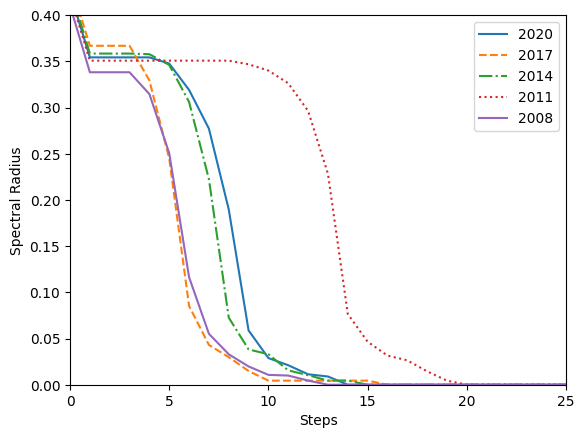

<Figure size 640x480 with 0 Axes>

In [12]:
result(file_path_2020,file_path_2017,file_path_2014,file_path_2011,file_path_2008)

In [10]:
df=fun1(file_path_2020)
df1=fun2(df)
df1=fun3(df1)
G=plot(df1)

1487521608.6110005


In [13]:
params = {
   'runs': 1,
   'steps': 100,
   'seed': 1,

   'l': 0.8,
   'r': 0.2,
   'c': int(0.1 * len(G)),
   #  'c': tuple(dict(nx.betweenness_centrality(G,normalized=True)).values()),

   'k_a': 10,
   'attack': 'id_node',
   # 'attack_approx': int(0.1 * len(G)),

   'k_d': 0,
   'defense': None,

   'robust_measure': 'spectral_radius',

   'plot_graph_transition': True,  # False turns off key simulation image "snapshots"
   'gif_animation': False,  # True creaets a video of the simulation (MP4 file)
   'gif_snaps': True,  # True saves each frame of the simulation as an image

   # 'edge_style': 'bundled',
   # 'node_style': 'force_atlas',
   # 'fa_iter': 2000,
}

In [14]:
def get_results():
    global params
    result_list=[]
    for load in [0.6,0.7,0.8,0.9,1.0]:
        params["l"]=load
        cascading = Cascading(G, **params)
        results = cascading.run_simulation()
        result_list.append(results)
    return result_list

In [15]:
cascading = Cascading(G, **params)
results = cascading.run_simulation()

Running simulation 1 times


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/graph_tiger/utils.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph).todense()


In [16]:
def plot_results(graph, xlabel='Steps', line_label='', experiment=''):
    plt.figure(figsize=(6.4, 4.8))

    # title = '{}:step={},l={},r={},k_a={},attack={},k_d={},defense={}'.format(experiment, params['steps'], params['l'], params['r'], params['k_a'],
    #                                                                               params['attack'], params['k_d'], params['defense'])

    title=""

    result_list=get_results()
    result_norm_list=[]
    for res in result_list:
        key=[i for i in range(len(res))]
        d=zip(key,res)
        d=dict(d)

        for strength, result in d.items():
            result_norm = [r / len(graph) for r in res]
        result_norm_list.append(result_norm)
    # print(len(result_norm_list))
    # print(result_norm_list)
    plt.plot(result_norm_list[0], label="{}: {}".format(line_label, strength),linestyle='-')
    plt.plot(result_norm_list[1], label="{}: {}".format(line_label, strength),linestyle='--')
    plt.plot(result_norm_list[2], label="{}: {}".format(line_label, strength),linestyle='-.')
    plt.plot(result_norm_list[3], label="{}: {}".format(line_label, strength),linestyle=':')
    plt.plot(result_norm_list[4], label="{}: {}".format(line_label, strength),linestyle='-')

    plt.xlabel(xlabel)
    plt.ylabel("Spectral Radius")
    plt.ylim(0, 0.38)
    plt.xlim(0,40)

    save_dir = os.getcwd() + '/plots/' + experiment + '/'
    os.makedirs(save_dir, exist_ok=True)

    plt.legend(["initial load: 0.6","initial load: 0.7","initial load: 0.8","initial load: 0.9","initial load: 1.0",],loc='lower right')
    plt.title(title)
    plt.savefig('22.pdf')
    plt.show()
    plt.clf()

Running simulation 1 times
Running simulation 1 times


/Users/sunruogu/miniconda3/envs/Network_Attack/lib/python3.8/site-packages/graph_tiger/utils.py:44: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph).todense()


Running simulation 1 times
Running simulation 1 times
Running simulation 1 times


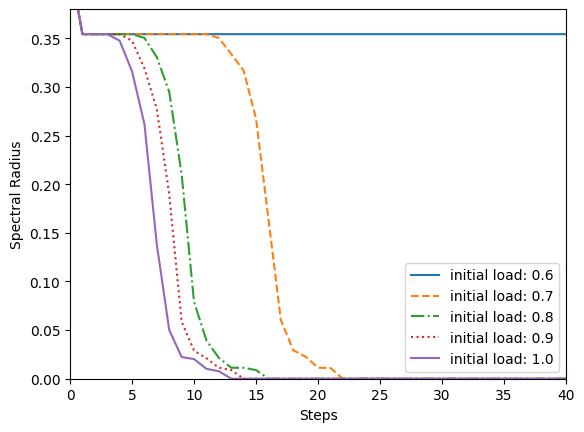

<Figure size 640x480 with 0 Axes>

In [17]:
plot_results(G)